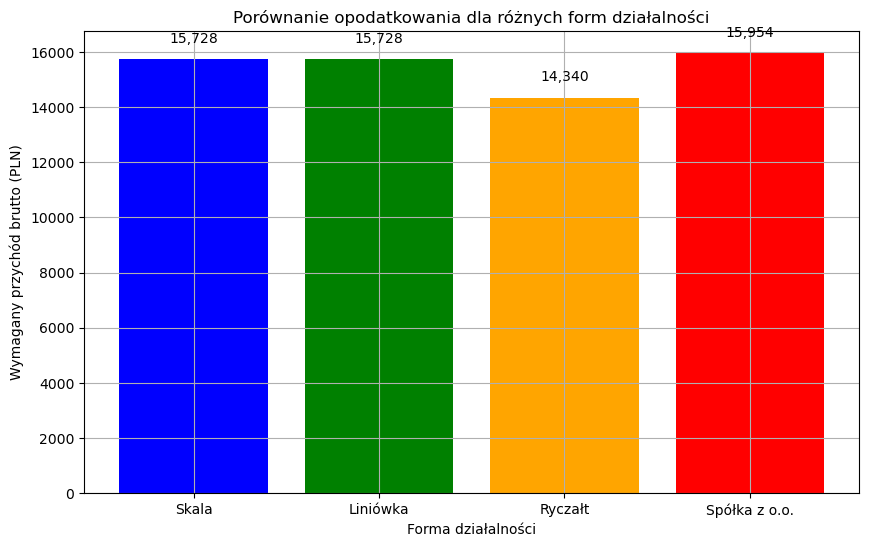

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
net_income = 11760  # netto
vat_rate = 0.23
social_contributions = 1457.49  # Uproszczone składki ZUS dla JDG
health_contributions = 314.10  # Uproszczone składki zdrowotne dla JDG

# Przybliżone koszty dla spółki z o.o.
corporate_tax = 0.09  # CIT
dividend_tax = 0.19  # podatek od dywidendy

# Funkcje do obliczeń
def calculate_gross_income_for_jdg(net_income, tax_function):
    """
    Oblicz przychód brutto dla JDG, który daje zadane dochody netto.
    """
    gross_income = net_income + social_contributions
    tax = tax_function(gross_income)
    return gross_income + tax

def tax_scale(gross_income):
    # Skala podatkowa (19% i 32%)
    tax_threshold = 120000
    if gross_income <= tax_threshold:
        tax = gross_income * 0.19
    else:
        tax = (gross_income - tax_threshold) * 0.32 + tax_threshold * 0.19
    return tax

def tax_flat(gross_income):
    # Podatek liniowy 19%
    return gross_income * 0.19

def tax_lump_sum(gross_income, lump_sum_rate):
    # Ryczałt, np. 8.5% dla przychodów z najmu
    return gross_income * lump_sum_rate

def tax_corporate(gross_income):
    # Spółka z o.o. - CIT + podatek od dywidendy
    profit = gross_income - (gross_income * corporate_tax)
    dividend = profit * (1 - dividend_tax)
    return gross_income * corporate_tax + profit - dividend

# Obliczenia
gross_jdg_scale = calculate_gross_income_for_jdg(net_income, tax_scale)
gross_jdg_flat = calculate_gross_income_for_jdg(net_income, tax_flat)
gross_jdg_lump_sum = calculate_gross_income_for_jdg(net_income, lambda x: tax_lump_sum(x, 0.085))
gross_corporate = net_income / ((1 - corporate_tax) * (1 - dividend_tax))

# Wartości brutto
gross_incomes = {
    'Skala': gross_jdg_scale,
    'Liniówka': gross_jdg_flat,
    'Ryczałt': gross_jdg_lump_sum,
    'Spółka z o.o.': gross_corporate
}

# Wizualizacja
labels = list(gross_incomes.keys())
values = [gross_incomes[label] for label in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Porównanie opodatkowania dla różnych form działalności')
plt.xlabel('Forma działalności')
plt.ylabel('Wymagany przychód brutto (PLN)')
plt.grid(True)

for i, v in enumerate(values):
    plt.text(i, v + 500, f'{int(v):,}', ha='center', va='bottom')

plt.show()


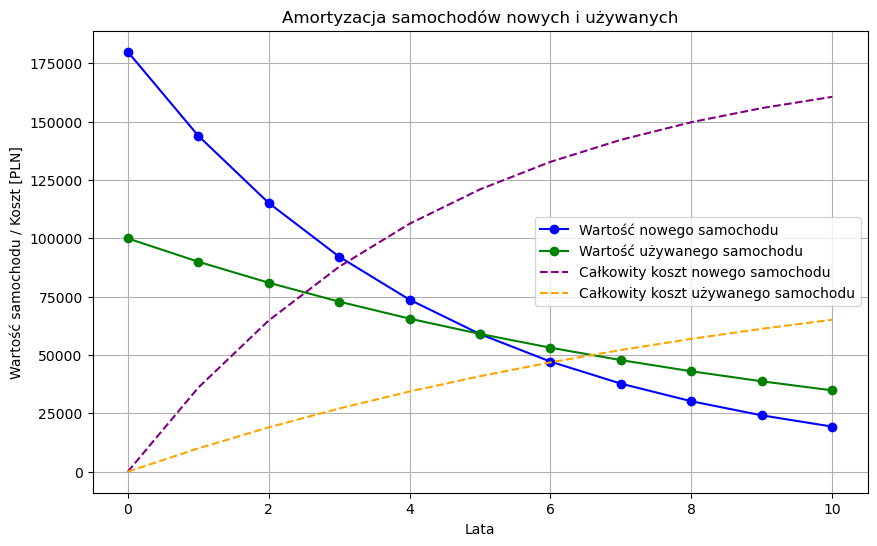

In [13]:
import matplotlib.pyplot as plt

def calculate_depreciation(initial_value, annual_depreciation_rate, years):
    value = initial_value
    depreciation_values = [value]
    for year in range(1, years + 1):
        value -= value * annual_depreciation_rate
        depreciation_values.append(value)
    return depreciation_values

def plot_car_costs(initial_value_new, 
                   initial_value_used, 
                   annual_depreciation_rate_new, 
                   annual_depreciation_rate_used, years):
    # Obliczanie wartości samochodów w czasie
    depreciation_new = calculate_depreciation(initial_value_new, annual_depreciation_rate_new, years)
    depreciation_used = calculate_depreciation(initial_value_used, annual_depreciation_rate_used, years)
    # Całkowity koszt samochodu
    total_cost_new = [initial_value_new - value for value in depreciation_new]
    total_cost_used = [initial_value_used - value for value in depreciation_used]
    
    # Wizualizacja danych
    plt.figure(figsize=(10, 6))
    
    # Wartości samochodów
    plt.plot(range(years + 1), depreciation_new, label='Wartość nowego samochodu', color='blue', marker='o')
    plt.plot(range(years + 1), depreciation_used, label='Wartość używanego samochodu', color='green', marker='o')
    
    # Całkowite koszty samochodów
    plt.plot(range(years + 1), total_cost_new, label='Całkowity koszt nowego samochodu', color='purple', linestyle='--')
    plt.plot(range(years + 1), total_cost_used, label='Całkowity koszt używanego samochodu', color='orange', linestyle='--')
    
    plt.title('Amortyzacja samochodów nowych i używanych')
    plt.xlabel('Lata')
    plt.ylabel('Wartość samochodu / Koszt [PLN]')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parametry początkowe
initial_value_new = 180000  # Początkowa wartość nowego samochodu w PLN
initial_value_used = 100000  # Początkowa wartość używanego samochodu w PLN
annual_depreciation_rate_new = 0.2  # Roczny spadek wartości dla nowego samochodu (15%)
annual_depreciation_rate_used = 0.1  # Roczny spadek wartości dla używanego samochodu (10%)
years = 10  # Okres użytkowania w latach

# Wywołanie funkcji
plot_car_costs(initial_value_new, initial_value_used, annual_depreciation_rate_new, annual_depreciation_rate_used, years)


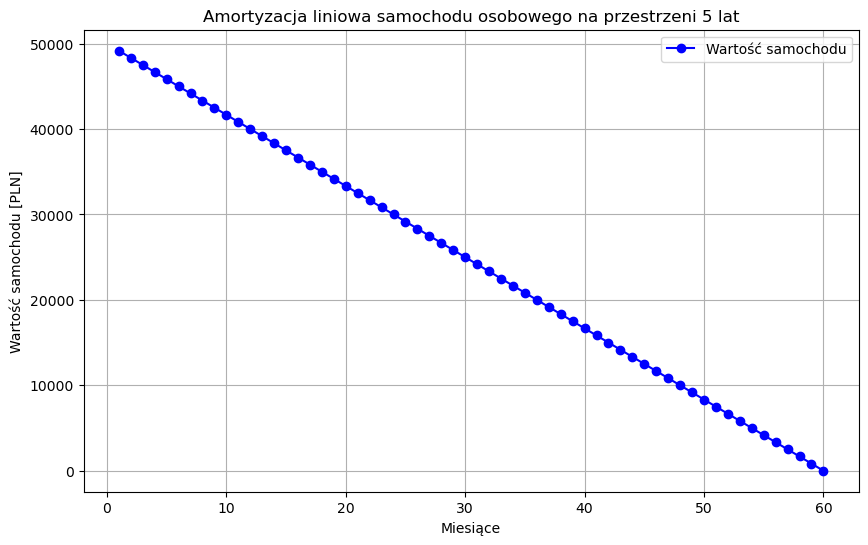

In [15]:
import matplotlib.pyplot as plt

def linear_depreciation(initial_value, annual_depreciation_rate, years):
    monthly_depreciation = (initial_value * annual_depreciation_rate) / 12
    depreciation_values = []
    value = initial_value
    
    for month in range(1, years * 12 + 1):
        value -= monthly_depreciation
        depreciation_values.append(value)
    
    return depreciation_values

def plot_linear_depreciation(initial_value, annual_depreciation_rate, years):
    # Obliczanie wartości samochodu w czasie
    depreciation_values = linear_depreciation(initial_value, annual_depreciation_rate, years)
    
    # Tworzenie osi czasu w miesiącach
    months = list(range(1, years * 12 + 1))
    
    # Wizualizacja danych
    plt.figure(figsize=(10, 6))
    plt.plot(months, depreciation_values, label='Wartość samochodu', color='blue', marker='o')
    plt.title('Amortyzacja liniowa samochodu osobowego na przestrzeni 5 lat')
    plt.xlabel('Miesiące')
    plt.ylabel('Wartość samochodu [PLN]')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parametry początkowe
initial_value = 50000  # Początkowa wartość samochodu w PLN
annual_depreciation_rate = 0.20  # Roczna stawka amortyzacji (20%)
years = 5  # Okres amortyzacji w latach

# Wywołanie funkcji
plot_linear_depreciation(initial_value, annual_depreciation_rate, years)


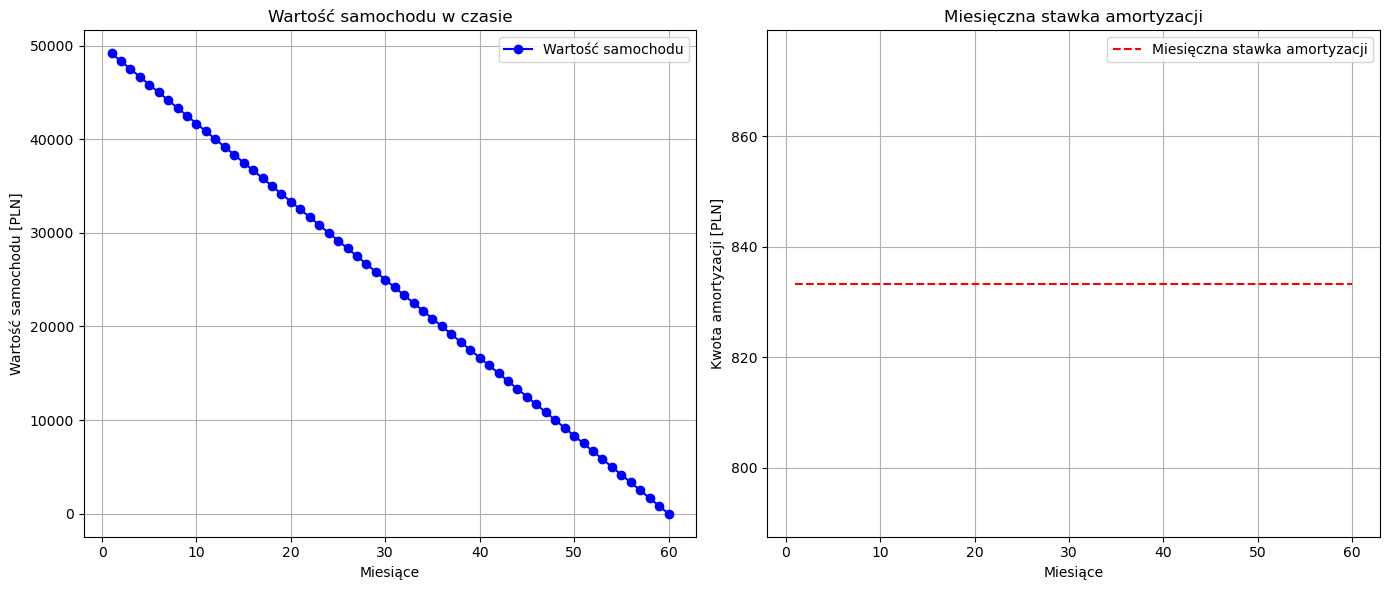

In [19]:
import matplotlib.pyplot as plt

def linear_depreciation(initial_value, annual_depreciation_rate, years):
    monthly_depreciation = (initial_value * annual_depreciation_rate) / 12
    depreciation_values = []
    value = initial_value
    
    for month in range(1, years * 12 + 1):
        value -= monthly_depreciation
        depreciation_values.append(value)
    
    return depreciation_values, monthly_depreciation

def plot_linear_depreciation(initial_value, annual_depreciation_rate, years):
    # Obliczanie wartości samochodu w czasie
    depreciation_values, monthly_depreciation = linear_depreciation(initial_value, annual_depreciation_rate, years)
    
    # Tworzenie osi czasu w miesiącach
    months = list(range(1, years * 12 + 1))
    
    # Tworzenie wykresów
    plt.figure(figsize=(14, 6))
    
    # Wykres wartości samochodu
    plt.subplot(1, 2, 1)
    plt.plot(months, depreciation_values, label='Wartość samochodu', color='blue', marker='o')
    plt.title('Wartość samochodu w czasie')
    plt.xlabel('Miesiące')
    plt.ylabel('Wartość samochodu [PLN]')
    plt.legend()
    plt.grid(True)
    
    # Wykres miesięcznej stawki amortyzacji
    plt.subplot(1, 2, 2)
    plt.plot(months, [monthly_depreciation] * len(months), label='Miesięczna stawka amortyzacji', color='red', linestyle='--')
    plt.title('Miesięczna stawka amortyzacji')
    plt.xlabel('Miesiące')
    plt.ylabel('Kwota amortyzacji [PLN]')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Parametry początkowe
initial_value = 50000  # Początkowa wartość samochodu w PLN
annual_depreciation_rate = 0.20  # Roczna stawka amortyzacji (20%)
years = 5  # Okres amortyzacji w latach

# Wywołanie funkcji
plot_linear_depreciation(initial_value, annual_depreciation_rate, years)


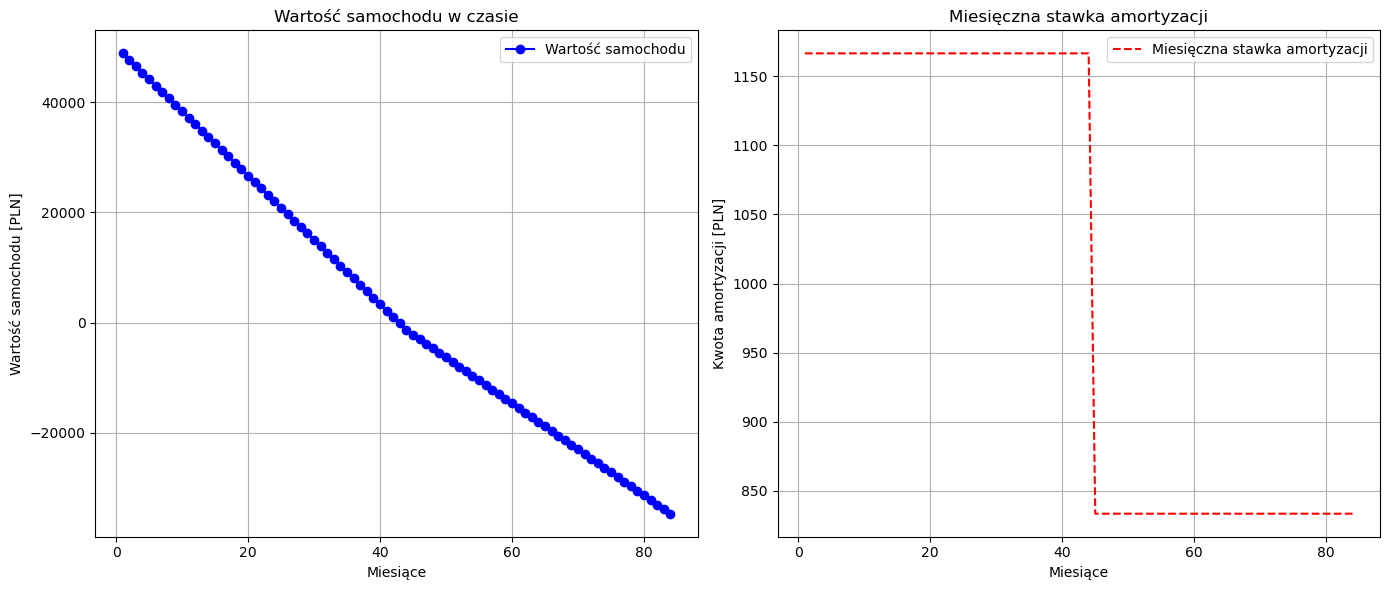

In [21]:
import matplotlib.pyplot as plt

def individual_linear_depreciation(initial_value, high_rate, low_rate, high_period_months, total_years):
    high_monthly_depreciation = (initial_value * high_rate) / 12
    low_monthly_depreciation = (initial_value * low_rate) / 12
    
    total_months = total_years * 12
    depreciation_values = []
    value = initial_value
    
    for month in range(1, total_months + 1):
        if month <= high_period_months:
            value -= high_monthly_depreciation
        else:
            value -= low_monthly_depreciation
        depreciation_values.append(value)
    
    return depreciation_values, high_monthly_depreciation, low_monthly_depreciation

def plot_individual_linear_depreciation(initial_value, high_rate, low_rate, high_period_months, total_years):
    # Obliczanie wartości samochodu w czasie
    depreciation_values, high_monthly_depreciation, low_monthly_depreciation = individual_linear_depreciation(
        initial_value, high_rate, low_rate, high_period_months, total_years
    )
    
    # Tworzenie osi czasu w miesiącach
    months = list(range(1, total_years * 12 + 1))
    
    # Tworzenie wykresów
    plt.figure(figsize=(14, 6))
    
    # Wykres wartości samochodu
    plt.subplot(1, 2, 1)
    plt.plot(months, depreciation_values, label='Wartość samochodu', color='blue', marker='o')
    plt.title('Wartość samochodu w czasie')
    plt.xlabel('Miesiące')
    plt.ylabel('Wartość samochodu [PLN]')
    plt.legend()
    plt.grid(True)
    
    # Wykres miesięcznej stawki amortyzacji
    monthly_depreciations = [high_monthly_depreciation if month <= high_period_months else low_monthly_depreciation for month in months]
    
    plt.subplot(1, 2, 2)
    plt.plot(months, monthly_depreciations, label='Miesięczna stawka amortyzacji', color='red', linestyle='--')
    plt.title('Miesięczna stawka amortyzacji')
    plt.xlabel('Miesiące')
    plt.ylabel('Kwota amortyzacji [PLN]')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Parametry początkowe
initial_value = 50000  # Początkowa wartość samochodu w PLN
high_rate = 0.28       # Wysoka roczna stawka amortyzacji (28%)
low_rate = 0.20        # Standardowa roczna stawka amortyzacji (20%)
high_period_months = 44  # Okres wysokiej stawki amortyzacji w miesiącach (3 lata i 7 miesięcy)
total_years = 7        # Całkowity okres amortyzacji w latach

# Wywołanie funkcji
plot_individual_linear_depreciation(initial_value, high_rate, low_rate, high_period_months, total_years)
